In [26]:
#exercise 1: we are importing pandas and numpy libraries for 
# data manipulation and numerical operations
import pandas as pd
import numpy as np


In [27]:
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Pandas version: 2.3.3
NumPy version: 2.3.5


In [28]:
df = pd.DataFrame({'Status': ['Pandas is working!', 'Ready to analyze']})
print(df)

               Status
0  Pandas is working!
1    Ready to analyze


In [29]:
## Exercise 2: Cleaning a Messy capstone_dataset
#This dataset contains book orders with issues such as:
#- Duplicate rows
#- Inconsistent capitalization and spacing in titles
#- Missing values in Price and Quantity
#- Typo in Order_ID ("12 0" instead of "120")

#We will use Pandas to clean it step by step.


In [30]:
# 1. LOAD: Read the file you just created
df = pd.read_csv('moringa_toolkit.csv')

In [31]:
# Use an 'r' before the quotes to handle Windows backslashes correctly
df = pd.read_csv(r'C:\Users\user\Desktop\moringa_toolkit.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\moringa_toolkit.csv'

In [54]:
try:
    df = pd.read_csv('moringa_toolkit.csv')
except FileNotFoundError:
    print("❌ Error: Could not find 'moringa_toolkit.csv'. Please check the file name in your folder!")

In [33]:
# 2. EXPLORE: Show the first 5 rows
print("\n--- First 5 rows of your data ---")
print(df.head())


--- First 5 rows of your data ---
   Order_ID        Book_Title  Price  Quantity      Date
0       101  The Great Gatsby  15.99       1.0  1/1/2023
1       102  the great gatsby  15.99       1.0  1/1/2023
2       103              1984    NaN       2.0  1/2/2023
3       104         Moby Dick  25.00       1.0  1/3/2023
4       105         Moby Dick  25.00       1.0  1/3/2023


In [48]:
# Get a summary of the dataframe
print("\n--- Dataframe Info ---")
df.info()


--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       20 non-null     int64  
 1   Book_Title     20 non-null     object 
 2   Price          20 non-null     float64
 3   Quantity       20 non-null     float64
 4   Date           20 non-null     object 
 5   Total_Sales    20 non-null     float64
 6   Total_Revenue  20 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ KB


In [51]:
# shows statistical summary of the dataframe
df.describe(include='all')

,Order_ID,Book_Title,Price,Quantity,Date,Total_Sales,Total_Revenue
count,20.00000,20,20.000000,20.0,20,20.000000,20.000000
unique,NaN,12,NaN,NaN,14,NaN,NaN
top,NaN,The Great Gatsby,NaN,NaN,1/1/2023,NaN,NaN
freq,NaN,2,NaN,NaN,2,NaN,NaN
mean,110.50000,NaN,16.774000,1.5,NaN,22.024000,22.024000
std,5.91608,NaN,7.990599,1.0,NaN,11.651697,11.651697
min,101.00000,NaN,0.000000,1.0,NaN,0.000000,0.000000
25%,105.75000,NaN,11.750000,1.0,NaN,15.492500,15.492500
50%,110.50000,NaN,14.995000,1.0,NaN,20.500000,20.500000
75%,115.25000,NaN,20.500000,2.0,NaN,26.500000,26.500000


In [50]:
# Check for size
df.shape

(20, 7)

In [34]:
# 3. CLEAN: Fix the common 'Messy Data' issues
    # Strip hidden spaces and capitalize titles
df['Book_Title'] = df['Book_Title'].str.strip().str.title()

In [35]:
# Remove duplicate rows
df = df.drop_duplicates()

In [36]:
# 4. FILL MISSING VALUES: 
    # If Price is empty, set it to 0. If Quantity is empty, set it to 1.
df['Price'] = df['Price'].fillna(0)
df['Quantity'] = df['Quantity'].fillna(1)

In [37]:
# 5. CALCULATE: Add a new column for Total Sales
df['Total_Sales'] = df['Price'] * df['Quantity']

In [38]:
# 6. SAVE: Export your clean work to a new file
df.to_csv('cleaned_moringa_toolkit.csv', index=False)

In [40]:
print("\n--- Process Complete ---")
print("New file 'cleaned_moringa_toolkit.csv' has been created in your folder.")
print(df.head())


--- Process Complete ---
New file 'cleaned_moringa_toolkit.csv' has been created in your folder.
   Order_ID        Book_Title  Price  Quantity      Date  Total_Sales
0       101  The Great Gatsby  15.99       1.0  1/1/2023        15.99
1       102  The Great Gatsby  15.99       1.0  1/1/2023        15.99
2       103              1984   0.00       2.0  1/2/2023         0.00
3       104         Moby Dick  25.00       1.0  1/3/2023        25.00
4       105         Moby Dick  25.00       1.0  1/3/2023        25.00


In [41]:
#transform data
df['Total_Revenue'] = df['Price'] * df['Quantity']

In [42]:
# Analyze data
# Which book made the most money?
top_books = df.groupby('Book_Title')['Total_Revenue'].sum().head(5)

In [43]:
%pip install matplotlib
import matplotlib.pyplot as plt



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import matplotlib.pyplot as plt

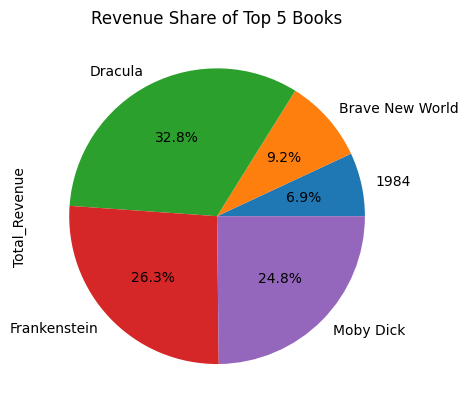

In [45]:
#visualize using pie chart
top_books.plot(kind='pie', autopct='%1.1f%%', title='Revenue Share of Top 5 Books')
plt.show()

<Axes: title={'center': 'Revenue by Book Title'}, xlabel='Book_Title'>

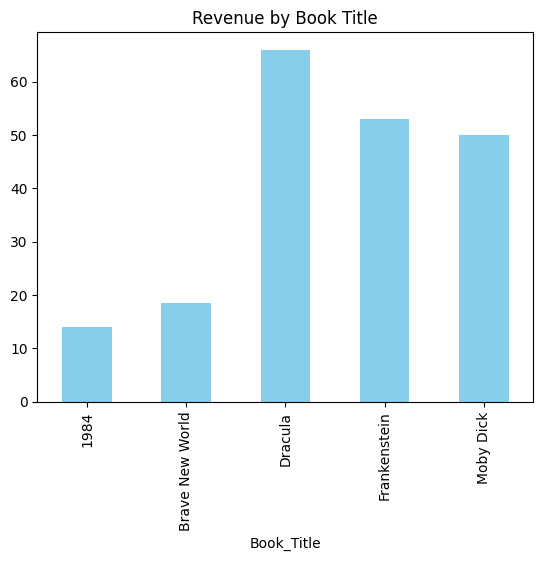

In [46]:
# Create a bar chart of our analysis
top_books.plot(kind='bar', color='skyblue', title='Revenue by Book Title')


In [47]:
df.head()

,Order_ID,Book_Title,Price,Quantity,Date,Total_Sales,Total_Revenue
0,101,The Great Gatsby,15.99,1.0,1/1/2023,15.99,15.99
1,102,The Great Gatsby,15.99,1.0,1/1/2023,15.99,15.99
2,103,1984,0.00,2.0,1/2/2023,0.00,0.00
3,104,Moby Dick,25.00,1.0,1/3/2023,25.00,25.00
4,105,Moby Dick,25.00,1.0,1/3/2023,25.00,25.00
